In [1]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 데이터 다운로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data( num_words=1000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
        return results

In [4]:
X_train = one_hot_sequences(X_train)
X_test = one_hot_sequences(X_test)

In [7]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [13]:
# 신경망 모델 구축
inputs = Input(shape=1000,)

x = Dense(32, activation='relu')(inputs)
x = Dense(24, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# 신경망 훈련, 검증 데이터 전달, 조기종료 적용
early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test), callbacks = [early_stopping], verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000 - 225ms/epoch - 5ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.5000 - 128ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4937 - val_loss: 0.6932 - val_accuracy: 0.5000 - 127ms/epoch - 3ms/step


In [16]:
# 신경망 훈련, 검증 데이터 전달, 조기종료 적용 X
early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5000 - 236ms/epoch - 5ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5000 - 136ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5000 - 128ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.5000 - 127ms/epoch - 3ms/step
Epoch 5/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000 - 127ms/epoch - 3ms/step
Epoch 6/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5000 - 130ms/epoch - 3ms/step
Epoch 7/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - 130ms/epoch - 3ms/step
Epoch 8/20
49/49 - 0s - loss: 0.6931 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5000 - 135ms/epoch - 3ms/step
Epoch 9/20
49/49

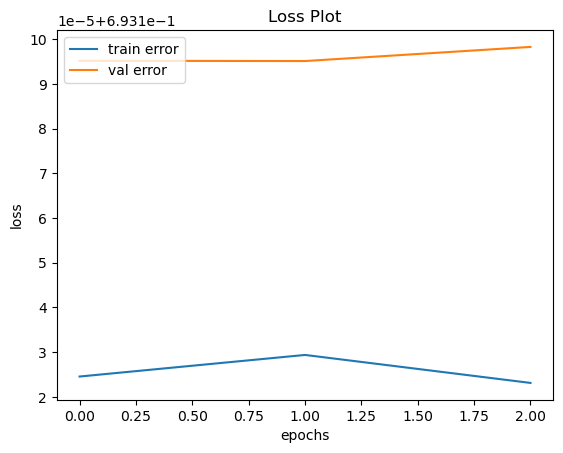

In [24]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력, 조기종료 적용
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

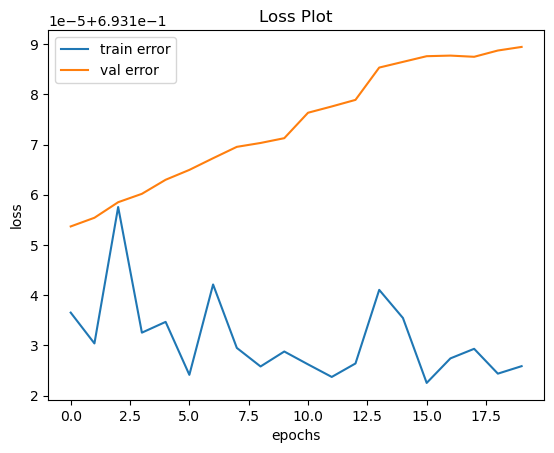

In [52]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력, 조기종료 적용 X
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()